# Logistic Regression
Constructing a model to predict whether or not a particular student will be admitted to a university, you have the results of two test scores and the final admissions of students who have previously applied, requiring you to construct a classification model to assess admissions.

## 绘制样本图像

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'data.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Sigmoid Function

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

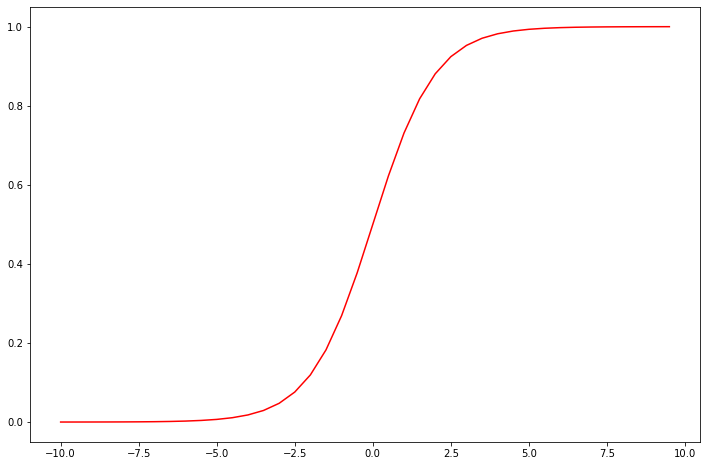

In [6]:
nums = np.arange(-10, 10, step=0.5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

## Cost Function

In [7]:
def cost(theta, X, Y):
    first = Y * np.log(sigmoid(X@theta.T))
    second = (1 - Y) * np.log(1 - sigmoid(X@theta.T))
    return -1 * np.mean(first + second)

Preprocessed data

In [8]:
# add ones column
data.insert(0, 'Ones', 1)

In [9]:
# set X(training data) and Y(target variable)
X = data.iloc[:, 0: -1].values
Y = data.iloc[:, -1].values
theta = np.zeros(3)

Check the dimensions of the matrix

In [10]:
theta

array([0., 0., 0.])

In [11]:
X.shape, Y.shape, theta.shape

((100, 3), (100,), (3,))

Calculate the initial cost (theta=0)

In [12]:
cost(theta, X, Y)

0.6931471805599453

## Gradient Descent

In [13]:
# Calculate step size
def gradient(theta, X, Y):
    return (1/len(X) * X.T @ (sigmoid(X @ theta.T) - Y))

#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     Y = np.matrix(Y)
    
#     parameters = int(theta.ravel().shape[1])
#     grad = np.zeros(parameters)
#     print(X.shape, theta.shape, (theta.T).shape, (X*theta.T).shape)
#     error = sigmoid(X * theta.T) - Y
    
#     for i in range(parameters):
#         term = np.multiply(error, X[:, i])
#         grad[i] = np.sum(term) / len(X)
        
#     return grad

In [14]:
gradient(theta, X, Y)

array([ -0.1       , -12.00921659, -11.26284221])

## Parameter Fitting

In [15]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, Y))
result

(array([-25.16131862,   0.20623159,   0.20147149]), 36, 0)

In [16]:
type(result)

tuple

In [17]:
cost(result[0], X, Y)

0.20349770158947464

Fit the optimal $\theta$ using Scipy.optimize.minimize

In [18]:
res = opt.minimize(fun=cost, x0=np.array(theta), args=(X, np.array(Y)), method='Newton-CG', jac=gradient)
res

     fun: 0.20349770451259855
     jac: array([1.62947970e-05, 1.11339134e-03, 1.07609314e-03])
 message: 'Optimization terminated successfully.'
    nfev: 71
    nhev: 0
     nit: 28
    njev: 242
  status: 0
 success: True
       x: array([-25.16576744,   0.20626712,   0.20150754])

In [19]:
cost(res.x, X, Y)

0.20349770451259855

## 预测分析

Predict by $\theta$：${h_\theta(x)=\frac{1}{1+e^{-\theta^TX}}}$

$h_\theta\ge0.5$, be $y=1$

$h_\theta<0.5$, be $y=0$

In [20]:
def predict(theta, X):
    probability = sigmoid(X @ theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

Accuracy

In [21]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if a^b == 0 else 0 for (a,b) in zip(predictions, Y)]
accuracy = (sum(correct) / len(correct))
print('accuracy = {0:.0f}%'.format(accuracy*100))

accuracy = 89%
